In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [296]:
df = pd.read_csv('final.csv').drop(columns = 'Unnamed: 0')
df['Event_start_time'] = pd.to_datetime(df['Event_start_time'] , utc=True)
df

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05 05:56:11+00:00,Ryan,7357.0,urination,1,0,2020-09-05,5,...,0.288322,0.025000,43.824931,43.799931,1,0.025000,43.824931,0.025000,43.824931,101177.571738
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18 09:41:37+00:00,Ryan,6935.0,urination,1,1,2020-07-18,9,...,0.468080,0.025000,52.400000,52.375000,2,0.025000,52.400000,52.625000,52.650000,104494.640069
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03 10:43:43+00:00,Ryan,7357.0,urination,1,0,2020-09-03,10,...,0.419434,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01 07:02:05+00:00,Ryan,6983.0,non_elimination,1,0,2020-09-01,7,...,0.149096,0.025000,9.899937,9.874937,1,0.025000,9.899937,0.025000,9.899937,147759.981924
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08 01:47:11+00:00,Ryan,7017.0,urination,1,1,2020-08-08,1,...,0.591323,0.025000,48.725000,48.700000,1,0.025000,48.725000,0.025000,48.725000,45809.900030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-23 20:36:18+00:00,Sparkler,4116.0,urination,1,0,2021-08-24,20,...,0.821368,0.025000,48.583258,48.558258,1,0.025000,48.583258,0.025000,48.583258,91388.188748
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26 01:29:01+00:00,Sparkler,4604.0,non_elimination,1,0,2021-04-26,1,...,0.111446,54.638859,68.894917,14.256058,4,53.792769,53.942769,71.308398,71.383398,78417.118743
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-26 22:47:55+00:00,Sparkler,4416.0,urination,1,0,2021-04-27,22,...,0.560874,0.025000,77.318402,77.293402,1,0.025000,77.318402,0.025000,77.318402,17117.024408
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-01 20:15:57+00:00,Sparkler,4386.0,defecation,1,0,2021-09-02,20,...,0.946741,0.025000,194.417593,194.392593,2,0.025000,194.417593,194.492593,194.542593,17249.936046


# Basic EDA

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13075 entries, 0 to 13074
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Device_ID               13075 non-null  object             
 1   Event_ID                13075 non-null  object             
 2   Event_start_time        13075 non-null  datetime64[ns, UTC]
 3   Name_of_cat             12931 non-null  object             
 4   Weight_of_cat           13075 non-null  float64            
 5   Activity                13072 non-null  object             
 6   Cat_In_Box              13075 non-null  int64              
 7   Synapse_Labeled         13075 non-null  int64              
 8   Event_Date              13075 non-null  object             
 9   Event_start_time_hour   13075 non-null  int64              
 10  Given_Tare_Weight       12062 non-null  float64            
 11  Activity_Duration       13075 non-null  f

In [298]:
df.isnull().sum()

Device_ID                    0
Event_ID                     0
Event_start_time             0
Name_of_cat                144
Weight_of_cat                0
Activity                     3
Cat_In_Box                   0
Synapse_Labeled              0
Event_Date                   0
Event_start_time_hour        0
Given_Tare_Weight         1013
Activity_Duration            0
Calculated_Tare_Weight       0
Weight_With_Cat              0
Points_Count                 0
Points_Percentage            0
Stepping_In_Time             0
Stepping_Out_Time            0
Sit_Time                     0
Times_Stepped                0
First_Stepin_Time            0
First_Stepout_Time           0
Last_Stepin_Time             0
Last_Stepout_Time            0
Weight_Variance              0
dtype: int64

In [299]:
df.nunique()

Device_ID                    82
Event_ID                  13075
Event_start_time          13062
Name_of_cat                  51
Weight_of_cat              3233
Activity                      3
Cat_In_Box                    2
Synapse_Labeled               2
Event_Date                  468
Event_start_time_hour        24
Given_Tare_Weight          7825
Activity_Duration         11704
Calculated_Tare_Weight    12888
Weight_With_Cat           12895
Points_Count               5429
Points_Percentage         10974
Stepping_In_Time           3394
Stepping_Out_Time         12466
Sit_Time                  12484
Times_Stepped                54
First_Stepin_Time          1944
First_Stepout_Time        11686
Last_Stepin_Time           5889
Last_Stepout_Time         12475
Weight_Variance           12543
dtype: int64

In [300]:
df.describe()

,Weight_of_cat,Cat_In_Box,Synapse_Labeled,Event_start_time_hour,Given_Tare_Weight,Activity_Duration,Calculated_Tare_Weight,Weight_With_Cat,Points_Count,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
count,13075.000000,13075.000000,13075.000000,13075.000000,12062.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,13075.000000,1.307500e+04
mean,4873.135832,0.998470,0.018585,10.494532,8708.200796,112.914337,9056.645771,13929.781602,2554.331319,0.538852,4.212123,61.942565,57.730442,2.283059,1.487646,46.929160,21.392248,64.539918,1.525341e+05
std,900.457113,0.039082,0.135060,6.733233,5586.830853,58.472873,3458.582048,3497.006320,2003.615313,0.239284,14.089307,50.533958,47.104588,3.869124,8.351486,47.530967,39.997811,52.072720,2.950257e+05
min,0.000000,0.000000,0.000000,0.000000,-58703.000000,3.983949,-1734.125000,1249.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,4247.000000,1.000000,0.000000,5.000000,6832.000000,74.374931,6910.262500,11482.837500,1196.500000,0.378977,0.025000,27.600637,25.098036,1.000000,0.025000,9.868629,0.025000,29.862444,2.835750e+04
50%,4697.000000,1.000000,0.000000,9.000000,8898.000000,105.928439,8839.575000,13689.750000,2064.000000,0.527174,0.025000,49.658830,47.204655,1.000000,0.025000,36.734026,0.225000,52.199947,5.965636e+04
75%,5509.000000,1.000000,0.000000,16.000000,10990.000000,140.805793,10838.025000,15870.375000,3448.500000,0.723966,0.799932,83.316077,77.949551,2.000000,0.150000,66.010875,30.818708,87.149085,1.579628e+05
max,7968.000000,1.000000,1.000000,23.000000,62999.000000,669.461843,20009.400000,24454.400000,24404.000000,1.000000,281.824953,608.527728,608.502728,111.000000,281.824953,608.527728,408.775000,608.527728,1.129851e+07


In [301]:
#We have data of 13075 Activities from 51 cats across 82 devices, we have for total of 474 days (29-06-2020 - 16-10-2021)

<AxesSubplot:xlabel='Activity', ylabel='count'>

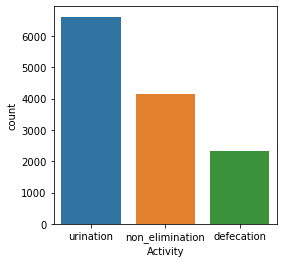

In [302]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(ax=ax, x = df['Activity'])

# Most Activity is of Urination and least is of Defecation

In [303]:
print(df['Event_Date'].min(), df['Event_Date'].max())

2020-06-29 2021-10-16


In [304]:
temp = df.groupby(['Device_ID']).mean()
temp['Given_Tare_Weight'].isnull()[:].value_counts()

# Out of 82 devices 7 devices have missing tare_weight

False    75
True      7
Name: Given_Tare_Weight, dtype: int64

In [305]:
len(df[(df['Cat_In_Box']==0)])

20

In [306]:
df['Synapse_Labeled'].value_counts()

0    12832
1      243
Name: Synapse_Labeled, dtype: int64

In [307]:
df[(df['Cat_In_Box']==0) & (df['Activity']!='non_elimination')]

# Only case when according to tags cat is not in box and urinating as well, but according to calcuations cat was in box

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
11025,VB00000000000177,RXZlbnRJbmZvcm1hdGlvbjphMDYzMmNhOS03NjhjLTQ3OW...,2021-04-23 04:32:58+00:00,Cartman,5178.0,urination,0,0,2021-04-23,4,...,0.351359,0.025,32.289855,32.264855,1,0.025,32.289855,0.025,32.289855,125352.863895


In [308]:
df[df['Weight_of_cat']==0]

,Device_ID,Event_ID,Event_start_time,Name_of_cat,Weight_of_cat,Activity,Cat_In_Box,Synapse_Labeled,Event_Date,Event_start_time_hour,...,Points_Percentage,Stepping_In_Time,Stepping_Out_Time,Sit_Time,Times_Stepped,First_Stepin_Time,First_Stepout_Time,Last_Stepin_Time,Last_Stepout_Time,Weight_Variance
3775,VA00000000000064,RXZlbnRJbmZvcm1hdGlvbjo0NGFkODI5NS03M2Y0LTQ4ZW...,2020-10-23 14:21:21+00:00,NaN,0.0,non_elimination,0,0,2020-10-23,14,...,0.950457,17.999938,34.724943,16.725005,47,0.025,0.050000,17.999938,34.724943,59800.313682
3952,VA00000000000065,RXZlbnRJbmZvcm1hdGlvbjpjYTRjMDZiMi03Y2VjLTQ5MW...,2020-10-27 14:54:30+00:00,NaN,0.0,non_elimination,0,0,2020-10-27,14,...,0.998962,53.799935,101.124951,47.325016,7,0.025,10.949949,107.949956,107.999938,627802.903189
3957,VA00000000000065,RXZlbnRJbmZvcm1hdGlvbjpkY2U3YzdhYS1kYTJhLTQyMD...,2020-10-26 14:04:11+00:00,NaN,0.0,non_elimination,0,0,2020-10-26,14,...,1.000000,0.000000,0.000000,0.000000,0,0.000,0.000000,0.000000,0.000000,0.000000


# Name of Cat

In [309]:
df['Name_of_cat'].nunique()
# Total number of cats

51

In [310]:
df[df['Name_of_cat'].isnull()]['Activity'].value_counts()

urination          78
non_elimination    34
defecation         32
Name: Activity, dtype: int64

In [311]:
len(df[df['Name_of_cat'].isnull()].groupby(['Device_ID'])['Device_ID'].count())
# Total number of devices with null cat names

21

In [312]:
#df[df['Name_of_cat'].isnull()][df['Name_of_cat'].isnull()].count()
df[df['Name_of_cat'].isnull()].groupby(['Device_ID'])['Device_ID'].count()
# Number of Null Name_of_cat for each device

Device_ID
VA00000000000037    16
VA00000000000038     3
VA00000000000042     5
VA00000000000047     1
VA00000000000048     1
VA00000000000055     9
VA00000000000059     1
VA00000000000064    42
VA00000000000065    48
VA00000000000067     1
VA00000000000113     2
VA00000000000137     1
VA00000000000142     1
VA00000000000144     1
VA00000000000145     3
VA00000000000148     2
VA00000000000155     2
VA00000000000156     1
VA00000000000159     1
VB00000000000171     1
VB00000000000173     2
Name: Device_ID, dtype: int64

## Cat weight description for different cats

In [314]:
df.groupby(['Name_of_cat'])['Weight_of_cat'].describe()

# Weight of Cat Variation across different cats after treating outlier

,count,mean,std,min,25%,50%,75%,max
Name_of_cat,,,,,,,,
Abby,394.0,4322.939086,203.947821,3448.0,4198.00,4265.00,4498.50,4823.0
Azure,512.0,4454.781250,144.923406,3863.0,4361.00,4415.00,4556.25,4932.0
Betty Lou,328.0,4452.760671,99.623096,4001.0,4393.00,4450.75,4524.25,4720.0
Bill,114.0,5365.307018,111.265578,5154.0,5298.00,5329.50,5419.00,5756.0
Boots,232.0,3607.875000,170.068606,3206.0,3470.75,3587.00,3746.25,4152.0
Bucks,73.0,5029.684932,122.615464,4740.0,4943.00,5009.00,5094.00,5344.0
Cartman,232.0,5198.821121,92.862891,4945.0,5143.25,5179.50,5243.75,5600.0
Corned Beef,314.0,5961.990446,119.147759,5421.0,5888.25,5947.00,6041.00,6292.0
Cracker Jack,319.0,4431.253918,176.287541,3591.0,4269.00,4496.00,4551.00,4817.0


## Name of cat and Activity relation

<AxesSubplot:xlabel='Name_of_cat', ylabel='count'>

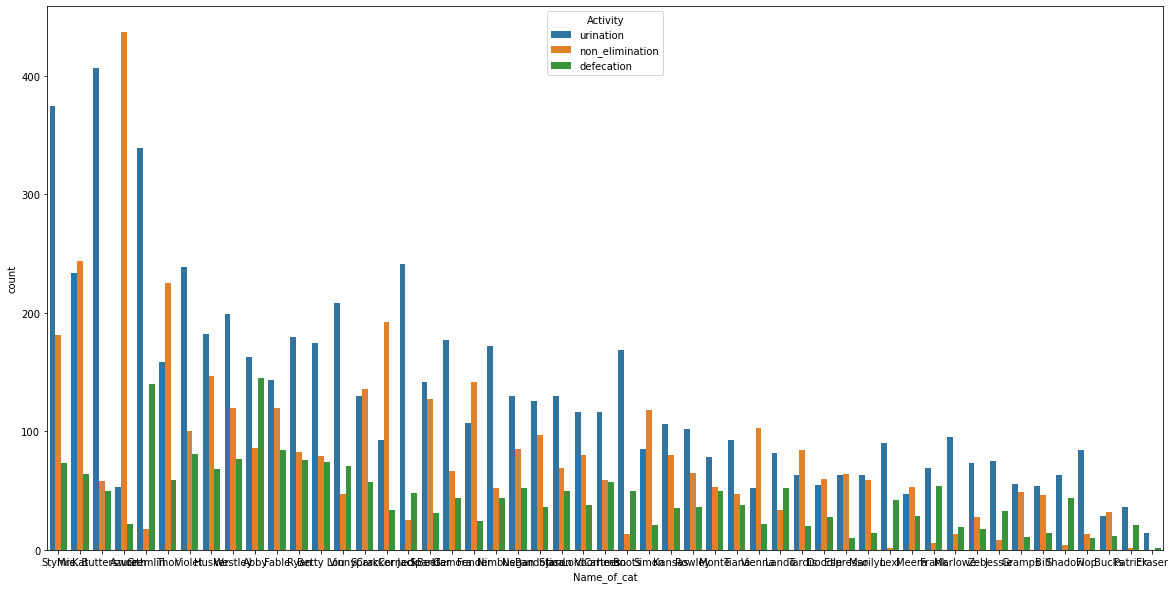

In [315]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(ax=ax, x = df['Name_of_cat'], hue = df['Activity'], order=df.Name_of_cat.value_counts().iloc[:].index)

# Device ID

## Number of cats used a device

In [313]:
df.groupby(['Device_ID'])['Name_of_cat'].nunique().head(50)

# Number of cat used for each device
# Most of the devices used by only one cat

Device_ID
VA00000000000017    1
VA00000000000020    1
VA00000000000021    1
VA00000000000022    1
VA00000000000023    1
VA00000000000027    1
VA00000000000037    7
VA00000000000038    5
VA00000000000039    1
VA00000000000040    1
VA00000000000041    1
VA00000000000042    5
VA00000000000043    1
VA00000000000044    1
VA00000000000045    1
VA00000000000046    1
VA00000000000047    6
VA00000000000048    4
VA00000000000049    1
VA00000000000050    1
VA00000000000051    1
VA00000000000054    1
VA00000000000055    5
VA00000000000057    1
VA00000000000058    1
VA00000000000059    2
VA00000000000060    1
VA00000000000061    1
VA00000000000062    1
VA00000000000063    1
VA00000000000064    2
VA00000000000065    2
VA00000000000067    3
VA00000000000069    1
VA00000000000070    1
VA00000000000072    1
VA00000000000073    1
VA00000000000075    1
VA00000000000076    1
VA00000000000108    1
VA00000000000109    1
VA00000000000110    1
VA00000000000113    5
VA00000000000115    1
VA00000000000119    1


## Number of devices used by a cat

In [333]:
df.groupby(['Name_of_cat'])['Device_ID'].nunique().head(60)

Name_of_cat
Abby                 3
Azure                3
Betty Lou            3
Bill                 1
Boots                2
Bucks                4
Cartman              4
Corned Beef          2
Cracker Jack         2
Doodle               2
Eraser               1
Espresso             2
Fable                3
Fender               2
Flop                 5
Frank                4
Gamora               1
Gramps               1
Gremlin              6
Husker               2
Jason Voorhees       2
Jessie               4
Kansas               2
Kat                  3
Lando                4
Lexi                 1
Marilyn              4
Marlowe              4
Meera                4
Monte                2
Mrs. Buttersworth    2
Negan                4
Nimbus               3
Pandorica            2
Patrick              4
Rowley               1
Ryan                 3
Shadow               4
Simon                1
Spark                2
Sparkler             3
Star Lord            2
Stymie               2

## Device first used and last used time

In [316]:
duration_of_device = df.groupby('Device_ID')['Event_start_time'].agg(['min', 'max'])
duration_of_device

,min,max
Device_ID,,
VA00000000000017,2020-07-07 21:34:30+00:00,2020-09-07 23:32:58+00:00
VA00000000000020,2020-06-29 06:53:26+00:00,2020-08-09 18:27:29+00:00
VA00000000000021,2020-07-07 08:33:13+00:00,2020-09-04 00:31:49+00:00
VA00000000000022,2020-07-07 08:19:04+00:00,2020-10-02 11:14:13+00:00
VA00000000000023,2020-07-07 08:19:18+00:00,2020-08-16 09:38:29+00:00
...,...,...
VB00000000000188,2021-04-23 03:49:11+00:00,2021-10-03 14:01:02+00:00
VB00000000000189,2021-04-23 01:56:46+00:00,2021-10-05 07:44:30+00:00
VB00000000000190,2021-04-23 02:18:03+00:00,2021-10-05 06:40:29+00:00


## Device_ID and Activity relation

<AxesSubplot:xlabel='Device_ID', ylabel='count'>

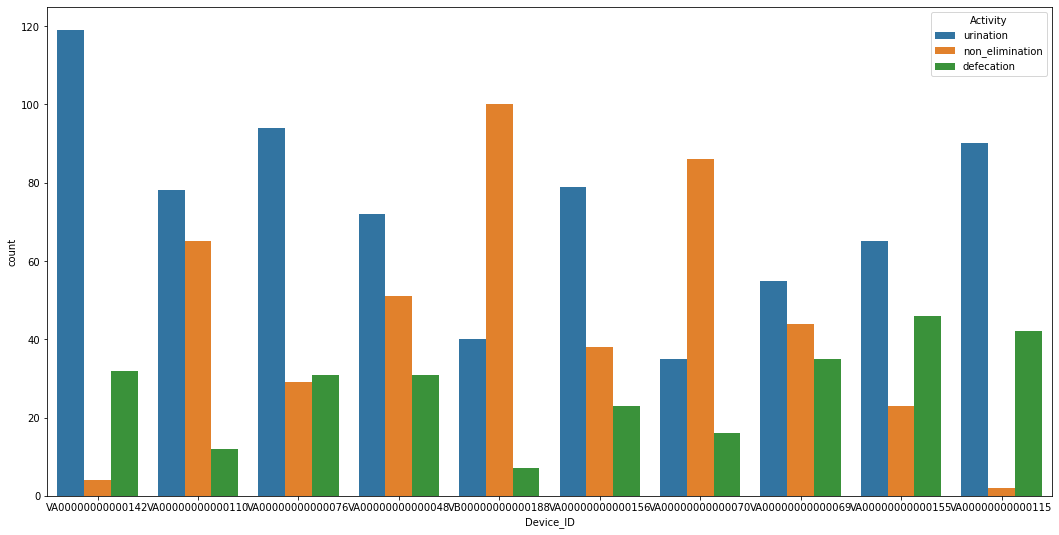

In [317]:
#temp = df[df['Device_ID'] == 'VB00000000000171']['Device_ID']
temp = df['Device_ID']
fig, ax = plt.subplots(figsize=(18, 9))
sns.countplot(ax=ax, x = temp, hue = df['Activity'], order=df.Device_ID.value_counts().iloc[30:40].index)

<AxesSubplot:xlabel='Activity', ylabel='count'>

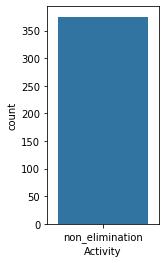

In [318]:
temp = df[(df['Device_ID'] == 'VB00000000000171') & (df['Name_of_cat'] == 'Azure')]

fig, ax = plt.subplots(figsize=(2, 4))
sns.countplot(ax=ax, x = temp['Activity'])

# Device_ID 'VB00000000000171' for cat 'Azure' has all non_elimination activity

# Tare Weight

In [319]:
df.aggregate({"Calculated_Tare_Weight":['count', 'min', 'max', 'mean', 'std']})

,Calculated_Tare_Weight
count,13075.000000
min,-1734.125000
max,20009.400000
mean,9056.645771
std,3458.582048


## Tare Weight statistics for each device

In [320]:
#df.groupby(['Device_ID']).aggregate({"Tare_Weight":['count', 'min', 'max', 'mean', 'std']})
df.groupby(['Device_ID'])['Calculated_Tare_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Device_ID,,,,,,,,
VA00000000000017,67.0,6820.660448,1625.165164,4340.950,5145.52500,6950.100,8340.20000,11144.200
VA00000000000020,77.0,8600.341883,1424.478005,6980.350,7322.32500,8230.275,9198.05000,13181.100
VA00000000000021,63.0,8798.180159,1592.371344,6177.300,8076.78750,8779.500,10514.53750,12855.125
VA00000000000022,78.0,7969.823077,1434.312155,6264.000,7045.93125,7630.425,8224.58125,11915.225
VA00000000000023,59.0,6042.494915,1668.302050,3351.200,4400.88750,6706.100,7080.63750,8607.550
...,...,...,...,...,...,...,...,...
VB00000000000188,147.0,9197.577721,1055.241312,3032.350,8801.12500,9446.300,9756.93750,10344.925
VB00000000000189,105.0,7322.448571,925.300009,3328.400,6942.12500,7404.825,7661.25000,8857.250
VB00000000000190,214.0,10430.770093,807.703113,6558.475,10171.01250,10432.150,10747.47500,12041.825


## Cat Weight for different cats

In [321]:
df.groupby(['Name_of_cat'])['Weight_of_cat'].describe().head(30)

,count,mean,std,min,25%,50%,75%,max
Name_of_cat,,,,,,,,
Abby,394.0,4322.939086,203.947821,3448.0,4198.00,4265.00,4498.50,4823.0
Azure,512.0,4454.781250,144.923406,3863.0,4361.00,4415.00,4556.25,4932.0
Betty Lou,328.0,4452.760671,99.623096,4001.0,4393.00,4450.75,4524.25,4720.0
Bill,114.0,5365.307018,111.265578,5154.0,5298.00,5329.50,5419.00,5756.0
Boots,232.0,3607.875000,170.068606,3206.0,3470.75,3587.00,3746.25,4152.0
Bucks,73.0,5029.684932,122.615464,4740.0,4943.00,5009.00,5094.00,5344.0
Cartman,232.0,5198.821121,92.862891,4945.0,5143.25,5179.50,5243.75,5600.0
Corned Beef,314.0,5961.990446,119.147759,5421.0,5888.25,5947.00,6041.00,6292.0
Cracker Jack,319.0,4431.253918,176.287541,3591.0,4269.00,4496.00,4551.00,4817.0


## Stepping in time description for different activity 

In [322]:
df.groupby(['Name_of_cat', 'Activity'])['Stepping_In_Time'].describe().head(30)

count       mean        std    min    25%  \
Name_of_cat  Activity                                                     
Abby         defecation       145.0   1.593059   7.301120  0.025  0.025   
             non_elimination   86.0   3.708379  13.154348  0.000  0.025   
             urination        163.0   1.252043   6.894150  0.000  0.025   
Azure        defecation        22.0   5.411264  13.322639  0.025  0.025   
             non_elimination  437.0   4.037831  11.330141  0.000  0.025   
             urination         53.0  16.796090  27.882398  0.025  0.025   
Betty Lou    defecation        74.0   6.287044  15.681026  0.025  0.025   
             non_elimination   79.0   3.903400  13.775333  0.000  0.025   
             urination        175.0   3.305296  12.036473  0.025  0.025   
Bill         defecation        14.0   6.969631  16.518409  0.025  0.025   
             non_elimination   46.0   3.726618  15.729132  0.000  0.025   
             urination         54.0   0.610642   2.116404  0.025  0.025   
Boots        defecation        50.0   9.759478  18.187521  0.000  0.000   
             non_elimination   13.0  10.421140  23.067782  0.000  0.000   
             urination        169.0   1.407244   7.042394  0.000  0.000   
Bucks        defecation        12.0   4.342142   8.678112  0.025  0.025   
             non_elimination   32.0   2.343215   4.424293  0.000  0.025   
             urination         29.0   4.908593  17.225340  0.000  0.025   
Cartman      defecation        57.0   4.466121   9.361202  0.000  0.025   
             non_elimination   59.0   3.297727  10.787577  0.000  0.000   
             urination        116.0   5.183535  10.671978  0.000  0.025   
Corned Beef  defecation        48.0   3.555908  11.338840  0.025  0.025   
             non_elimination   25.0   5.459455  10.750689  0.000  0.025   
             urination        241.0   1.696111   7.163536  0.025  0.025   
Cracker Jack defecation        34.0  14.638246  29.797950  0.025  0.025   
             non_elimination  192.0   4.038216  14.426117  0.000  0.025   
             urination         93.0   3.613443  12.356809  0.025  0.025   
Doodle       defecation        28.0   8.288383  31.706053  0.025  0.025   
             non_elimination   60.0   6.034986  17.584800  0.000  0.025   
             urination         55.0   0.892723   4.751525  0.025  0.025   

                                   50%        75%         max  
Name_of_cat  Activity                                          
Abby         defecation       0.025000   0.175000   57.200000  
             non_elimination  0.025000   0.025000   89.962777  
             urination        0.025000   0.025000   75.609354  
Azure        defecation       0.025000   1.568701   56.049932  
             non_elimination  0.700000   1.971954   92.857599  
             urination        0.025000  34.371154   89.724936  
Betty Lou    defecation       0.025000   1.682678   87.450011  
             non_elimination  0.025000   1.123303   93.174933  
             urination        0.025000   0.350000   97.599931  
Bill         defecation       0.025000   0.681250   59.699942  
             non_elimination  0.025000   0.618750   94.524946  
             urination        0.025000   0.025000   13.674950  
Boots        defecation       0.025000  12.168682   68.799932  
             non_elimination  0.025000   0.025000   67.724930  
             urination        0.025000   0.025000   49.074942  
Bucks        defecation       0.862827   2.667848   29.599289  
             non_elimination  0.237500   2.752805   19.847401  
             urination        0.025000   2.689092   92.949931  
Cartman      defecation       0.225000   0.775000   39.324933  
             non_elimination  0.025000   0.537500   55.624947  
             urination        0.025000   3.887444   45.699932  
Corned Beef  defecation       0.025000   0.456250   56.153021  
             non_elimination  0.025000   3.999936   36.649948  
             urination       

## Stepping out time description for different activity 

In [323]:
df.groupby(['Name_of_cat', 'Activity'])['Stepping_Out_Time'].describe().head(30)

count        mean        std        min  \
Name_of_cat  Activity                                                   
Abby         defecation       145.0  111.062864  36.849688  12.950000   
             non_elimination   86.0   65.947119  59.388490   0.000000   
             urination        163.0   76.810137  50.714691   0.000000   
Azure        defecation        22.0   97.492105  32.527780  48.774941   
             non_elimination  437.0   37.573069  30.621178   0.000000   
             urination         53.0   64.362795  45.158011  19.994148   
Betty Lou    defecation        74.0  106.122686  37.380936  46.174952   
             non_elimination   79.0   42.824727  47.796434   0.000000   
             urination        175.0   39.247592  30.765099   3.449944   
Bill         defecation        14.0  108.073163  36.784399  32.424935   
             non_elimination   46.0   20.718968  26.239652   0.000000   
             urination         54.0   42.610132  18.609550  14.124949   
Boots        defecation        50.0   60.996963  50.770025   0.000000   
             non_elimination   13.0   29.294201  49.937856   0.000000   
             urination        169.0   17.170379  19.358469   0.000000   
Bucks        defecation        12.0   83.279334  24.612384  35.202565   
             non_elimination   32.0   28.358536  20.593894   0.000000   
             urination         29.0   40.557090  28.850136   0.000000   
Cartman      defecation        57.0   81.628828  23.056526   0.000000   
             non_elimination   59.0   21.881997  34.164913   0.000000   
             urination        116.0   50.575859  21.800444   0.000000   
Corned Beef  defecation        48.0  140.486385  50.797156  87.349947   
             non_elimination   25.0   30.730635  25.247153   0.000000   
             urination        241.0   72.681453  34.205751  21.100020   
Cracker Jack defecation        34.0  130.680066  46.501639  52.950024   
             non_elimination  192.0   50.304988  41.846274   0.000000   
             urination         93.0   74.651476  37.231684  26.824947   
Doodle       defecation        28.0  134.832981  42.967613  50.849930   
             non_elimination   60.0   57.316616  54.603382   0.000000   
             urination         55.0   53.529036  19.331530  24.749953   

                                     25%         50%         75%         max  
Name_of_cat  Activity                                                         
Abby         defecation        89.995850  107.874949  130.149940  271.499950  
             non_elimination   18.814737   53.525157   99.343695  274.399932  
             urination         44.670199   61.326540   87.175987  321.955343  
Azure        defecation        76.587442   89.549944  104.932494  173.374937  
             non_elimination   15.196712   28.724933   51.056593  162.280380  
             urination         32.424942   40.124933   90.159098  188.257619  
Betty Lou    defecation        88.147084  100.762464  114.583448  281.928804  
             non_elimination   11.135231   26.749993   54.490128  247.124945  
             urination         23.401435   28.779299   43.831976  200.850510  
Bill         defecation        99.281220  110.249944  117.549936  170.199931  
             non_elimination    3.581191   11.799932   23.993715  109.224984  
             urination         28.599935   38.599991   51.456183  102.174951  
Boots        defecation         0.000000   73.674939  101.293690  152.499947  
             non_elimination    0.000000    4.099945   28.524933  165.774944  
             urination          0.000000   17.899945   26.424941  123.224933  
Bucks        defecation        71.576993   79.616942  103.760563  124.424943  
             non_elimination   17.533718   23.853656   37.836976   88.225032  
             urination         24.574933   41.692886   53.325038  138.949941  
Cartman      defecation        71.224950   80.749943   93.674931  129.349941  
             non_elimination    0.

# Sit Time

In [324]:
df.groupby(['Activity'])['Sit_Time'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity,,,,,,,,
defecation,2316.0,107.538958,51.028995,0.0,74.180466,101.212303,132.921924,608.502728
non_elimination,4146.0,32.730224,38.912401,0.0,9.514718,19.913174,40.856621,603.374932
urination,6610.0,55.977083,35.524953,0.0,35.325583,48.904603,68.072862,355.605496


## Sit time for each cat across different activity

In [325]:
df.groupby(['Name_of_cat', 'Activity'])['Sit_Time'].describe().head(30)

# defecation - longest mean sit time
# urination - mean sit time significantly different from defecation and non-elimination, std = 1.68 times mean
# non_elimination - shortest mean sit time, std = 0.85 times mean

count        mean        std        min  \
Name_of_cat  Activity                                                   
Abby         defecation       145.0  109.469806  37.419630  12.925000   
             non_elimination   86.0   62.238740  57.934006   0.000000   
             urination        163.0   75.558093  47.940815   0.000000   
Azure        defecation        22.0   92.080842  30.392986  48.749941   
             non_elimination  437.0   33.535238  27.310008   0.000000   
             urination         53.0   47.566704  24.135593  19.969148   
Betty Lou    defecation        74.0   99.835642  35.618180  46.149952   
             non_elimination   79.0   38.921328  41.948434   0.000000   
             urination        175.0   35.942296  26.520708   3.424944   
Bill         defecation        14.0  101.103532  34.510179  32.399935   
             non_elimination   46.0   16.992350  22.827863   0.000000   
             urination         54.0   41.999490  18.835881  14.099949   
Boots        defecation        50.0   51.237485  41.578009   0.000000   
             non_elimination   13.0   18.873061  44.790219   0.000000   
             urination        169.0   15.763135  16.317148   0.000000   
Bucks        defecation        12.0   78.937191  25.780086  33.601911   
             non_elimination   32.0   26.015321  20.028639   0.000000   
             urination         29.0   35.648498  21.071018   0.000000   
Cartman      defecation        57.0   77.162707  21.117251   0.000000   
             non_elimination   59.0   18.584270  30.395061   0.000000   
             urination        116.0   45.392324  17.220567   0.000000   
Corned Beef  defecation        48.0  136.930478  51.173707  86.600010   
             non_elimination   25.0   25.271180  23.977763   0.000000   
             urination        241.0   70.985343  33.347728  20.900020   
Cracker Jack defecation        34.0  116.041821  41.885823  52.100079   
             non_elimination  192.0   46.266772  35.814951   0.000000   
             urination         93.0   71.038033  34.056948  26.799947   
Doodle       defecation        28.0  126.544598  33.386480  50.824930   
             non_elimination   60.0   51.281630  54.427501   0.000000   
             urination         55.0   52.636312  18.914586  24.724953   

                                     25%         50%         75%         max  
Name_of_cat  Activity                                                         
Abby         defecation        88.318084  106.488002  130.124940  269.250002  
             non_elimination   18.789737   46.987474   85.487483  274.374932  
             urination         44.401441   59.899928   86.775993  246.345989  
Azure        defecation        72.067873   84.937477  104.882494  173.349937  
             non_elimination   13.807638   24.879729   46.060459  157.908995  
             urination         31.199932   38.424952   57.324981  140.124935  
Betty Lou    defecation        81.232860   94.907879  108.294271  281.030539  
             non_elimination    9.810450   25.414989   52.069691  190.924999  
             urination         22.399939   27.899945   40.501424  200.800510  
Bill         defecation        97.774968  109.187479  110.537446  160.024942  
             non_elimination    3.343692    9.112469   20.462435  108.325033  
             urination         28.099965   37.150015   51.431183  102.149951  
Boots        defecation         0.000000   64.524975   85.031183  122.899994  
             non_elimination    0.000000    4.074945   16.174981  165.749944  
             urination          0.000000   17.874945   25.674938   85.249983  
Bucks        defecation        62.355942   75.327179  102.064895  124.399943  
             non_elimination   13.569262   21.891261   33.196128   87.775032  
             urination         23.724981   40.724983   46.000010   80.296104  
Cartman      defecation        68.471567   79.474932   84.874999  128.974941  
             non_elimination    0.

# Weight Variance

In [326]:
df.groupby(['Activity'])['Weight_Variance'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity,,,,,,,,
defecation,2316.0,97951.814823,159763.785572,0.0,29640.256848,52418.730426,102338.895624,2.631467e+06
non_elimination,4146.0,260762.515135,451116.976855,0.0,35039.269979,103400.396756,316643.472633,1.129851e+07
urination,6610.0,103839.666787,157593.949300,0.0,25689.453997,50049.204993,124455.546669,3.039177e+06


## Weight Variance of different cats for different activities

In [327]:
df.groupby(['Name_of_cat', 'Activity'])['Weight_Variance'].describe()

count           mean            std  \
Name_of_cat Activity                                               
Abby        defecation       145.0   46628.906002   85873.773474   
            non_elimination   86.0   76669.933659  115230.472360   
            urination        163.0   46309.741040   72438.850018   
Azure       defecation        22.0  128318.689171  133732.976453   
            non_elimination  437.0  362557.965694  651271.509540   
...                            ...            ...            ...   
Westley     non_elimination  120.0   62955.038273  121247.441440   
            urination        199.0   30292.451336   20296.124661   
Zeb         defecation        18.0  135369.175257  163463.466370   
            non_elimination   28.0  268488.095564  309313.603305   
            urination         73.0  169972.898172  123148.395247   

                                      min           25%            50%  \
Name_of_cat Activity                                                     
Abby        defecation        7110.755935  13063.307839   19501.100797   
            non_elimination      0.000000  17459.793941   30762.632390   
            urination            0.000000  16299.249062   24128.457884   
Azure       defecation       18574.339938  40499.036535   62158.405210   
            non_elimination      0.000000  94462.371137  256877.803740   
...                                   ...           ...            ...   
Westley     non_elimination      0.000000  18855.705913   28359.403078   
            urination         7853.463008  19404.212226   25453.168798   
Zeb         defecation       17178.108345  68294.041195   86069.480677   
            non_elimination      0.000000  86116.735128  163213.018407   
            urination        26247.444161  56603.375867  147634.369353   

                                       75%           max  
Name_of_cat Activity                                      
Abby        defecation        46185.626726  8.147532e+05  
            non_elimination   69473.648319  6.497296e+05  
            urination         50402.920891  6.354483e+05  
Azure       defecation       171413.955092  4.614956e+05  
            non_elimination  470596.899503  1.129851e+07  
...                                    ...           ...  
Westley     non_elimination   57674.838386  9.041474e+05  
            urination         33510.324156  1.670708e+05  
Zeb         defecation       137589.503822  7.190476e+05  
            non_elimination  369606.769339  1.437406e+06  
            urination        277472.668117  4.758896e+05  

[152 rows x 8 columns]

# Times Stepped

In [328]:
df.groupby(['Activity'])['Times_Stepped'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity,,,,,,,,
defecation,2316.0,2.901554,5.521587,0.0,1.0,1.0,3.0,93.0
non_elimination,4146.0,2.134105,3.175047,0.0,1.0,1.0,2.0,52.0
urination,6610.0,2.160666,3.528098,0.0,1.0,1.0,2.0,111.0


## Times stepped for each Activity for different cats

In [329]:
df.groupby(['Activity', 'Name_of_cat'])['Times_Stepped'].describe()

count      mean        std  min  25%  50%  75%   max
Activity   Name_of_cat                                                      
defecation Abby         145.0  2.703448   5.779663  1.0  1.0  1.0  2.0  51.0
           Azure         22.0  1.454545   0.800433  1.0  1.0  1.0  2.0   4.0
           Betty Lou     74.0  2.243243   2.459596  1.0  1.0  1.0  2.0  17.0
           Bill          14.0  1.500000   0.650444  1.0  1.0  1.0  2.0   3.0
           Boots         50.0  2.560000   4.233781  0.0  0.0  1.0  2.0  19.0
...                       ...       ...        ...  ...  ...  ...  ...   ...
urination  Vienna        52.0  1.596154   1.361366  0.0  1.0  1.0  2.0   9.0
           Vinny        208.0  2.750000   3.336955  0.0  1.0  2.0  3.0  25.0
           Violet       239.0  2.020921   2.251886  1.0  1.0  1.0  2.0  20.0
           Westley      199.0  3.718593   3.848285  1.0  1.0  2.0  5.0  20.0
           Zeb           73.0  7.273973  13.609903  1.0  1.0  2.0  3.0  72.0

[152 rows x 8 columns]

# Points Count

In [330]:
df.groupby(['Activity'])['Points_Count'].describe()

# Clear difference in Points_Count for different Activities

,count,mean,std,min,25%,50%,75%,max
Activity,,,,,,,,
defecation,2316.0,4697.085924,2078.799107,0.0,3283.5,4391.0,5741.75,24404.0
non_elimination,4146.0,1468.413169,1698.191594,0.0,434.0,886.0,1846.25,24136.0
urination,6610.0,2485.483359,1504.555029,0.0,1570.0,2123.5,3002.00,15506.0


## Points Count for different cats on different activities

In [331]:
df.groupby(['Name_of_cat', 'Activity'])['Points_Count'].describe().head(30)

count         mean          std     min  \
Name_of_cat  Activity                                                   
Abby         defecation       145.0  4477.937931  1456.576018   529.0   
             non_elimination   86.0  2524.662791  2319.301338     0.0   
             urination        163.0  3053.730061  1934.376239     0.0   
Azure        defecation        22.0  3913.818182  1210.020843  1951.0   
             non_elimination  437.0  1513.000000  1254.854520     0.0   
             urination         53.0  2744.037736  1877.260289   813.0   
Betty Lou    defecation        74.0  4276.256757  1513.098989  1847.0   
             non_elimination   79.0  1718.544304  1678.828192    14.0   
             urination        175.0  1648.337143  1147.474887   138.0   
Bill         defecation        14.0  4147.000000  1308.512191  1297.0   
             non_elimination   46.0   686.847826   911.943613     0.0   
             urination         54.0  1702.462963   748.982649   565.0   
Boots        defecation        50.0  5106.240000  2039.192623  2095.0   
             non_elimination   13.0  2667.153846  2571.313019   164.0   
             urination        169.0  2350.964497  1535.428585     2.0   
Bucks        defecation        12.0  3257.166667   994.749199  1343.0   
             non_elimination   32.0  1076.031250   798.240666     0.0   
             urination         29.0  1582.793103  1092.442688     0.0   
Cartman      defecation        57.0  3165.333333   808.741313   962.0   
             non_elimination   59.0   806.813559  1221.822910     0.0   
             urination        116.0  1935.241379   717.332906   365.0   
Corned Beef  defecation        48.0  5524.854167  2049.461444  3465.0   
             non_elimination   25.0  1332.760000  1079.200255     5.0   
             urination        241.0  2873.141079  1352.564470   836.0   
Cracker Jack defecation        34.0  5186.176471  1881.809404  2086.0   
             non_elimination  192.0  2005.401042  1696.327848    47.0   
             urination         93.0  3059.483871  1652.355483  1073.0   
Doodle       defecation        28.0  5561.464286  1351.474188  2035.0   
             non_elimination   60.0  2201.100000  2196.573500    47.0   
             urination         55.0  2363.672727  1040.756546   990.0   

                                  25%     50%      75%      max  
Name_of_cat  Activity                                            
Abby         defecation       3604.00  4336.0  5292.00  10820.0  
             non_elimination   778.50  1892.0  3420.50  10984.0  
             urination        1783.00  2425.0  3485.00   9826.0  
Azure        defecation       3063.50  3669.5  4304.00   6935.0  
             non_elimination   579.00  1192.0  2011.00   8609.0  
             urination        1437.00  1934.0  3872.00   8817.0  
Betty Lou    defecation       3406.00  4050.5  4600.75  11268.0  
             non_elimination   458.50  1107.0  2188.00   7637.0  
             urination        1053.00  1381.0  1763.50   8074.0  
Bill         defecation       3911.75  4372.5  4629.75   6403.0  
             non_elimination   134.75   393.5   820.00   4340.0  
             urination        1140.25  1610.0  2059.00   4091.0  
Boots        defecation       3354.50  4367.5  6527.75   9568.0  
             non_elimination   657.00  2560.0  3360.00   9050.0  
             urination         971.00  1940.0  3424.00   8256.0  
Bucks        defecation       2774.75  3145.0  4077.50   4977.0  
             non_elimination   631.50   911.0  1452.50   3524.0  
             urination         949.00  1633.0  2134.00   4931.0  
Cartman      defecation       2820.00  3179.0  3607.00   5165.0  
             non_elimination    93.00   394.0   785.50   5227.0  
             urination        1485.00  1869.5  2251.25   5624.0  
Corned Beef  defecation       4348.75  5025.0  5928.75  15045.0  
             non_elimination   428.00  1145.0  1724.00   3759.0  
             urination        2002.00  2575

# Start Time in Hours

In [334]:
df.groupby(['Activity'])['Event_start_time_hour'].describe()

,count,mean,std,min,25%,50%,75%,max
Activity,,,,,,,,
defecation,2316.0,9.168826,6.380620,0.0,4.75,7.0,14.0,23.0
non_elimination,4146.0,10.317897,6.769709,0.0,5.00,9.0,15.0,23.0
urination,6610.0,11.066868,6.758444,0.0,6.00,10.0,16.0,23.0


In [335]:
df.groupby(['Name_of_cat', 'Activity'])['Event_start_time_hour'].describe()

count       mean       std  min  25%   50%   75%  \
Name_of_cat Activity                                                            
Abby        defecation       145.0  10.786207  7.081065  0.0  5.0  10.0  16.0   
            non_elimination   86.0   9.767442  7.322286  0.0  4.0   8.0  16.0   
            urination        163.0  11.588957  6.959078  0.0  7.0  11.0  17.0   
Azure       defecation        22.0   9.863636  4.843213  1.0  6.0  11.0  13.0   
            non_elimination  437.0   9.723112  7.276249  0.0  4.0   7.0  15.0   
...                            ...        ...       ...  ...  ...   ...   ...   
Westley     non_elimination  120.0   9.558333  6.990745  0.0  3.0   8.0  15.0   
            urination        199.0   9.738693  6.865376  0.0  4.0   8.0  15.0   
Zeb         defecation        18.0   7.166667  7.578996  1.0  2.0   3.0  13.0   
            non_elimination   28.0   8.285714  6.553807  1.0  3.0   6.5  14.0   
            urination         73.0   8.958904  6.216998  0.0  2.0   8.0  15.0   

                              max  
Name_of_cat Activity               
Abby        defecation       23.0  
            non_elimination  23.0  
            urination        23.0  
Azure       defecation       20.0  
            non_elimination  23.0  
...                           ...  
Westley     non_elimination  23.0  
            urination        23.0  
Zeb         defecation       20.0  
            non_elimination  20.0  
            urination        20.0  

[152 rows x 8 columns]